# PME3481 - Controle e Aplicações

## Projeto de Compensadores

### Preparação do Ambiente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

### Análise de Estabilidade

In [2]:
def analyze_stability(G):
    gm, pm, wg, wp = ctl.margin(G)
    print(f'Gain Margin (GM): {gm} dB')
    print(f'Phase Margin (PM): {pm} degrees')
    print(f'Gain Crossover Frequency: {wg} rad/s')
    print(f'Phase Crossover Frequency: {wp} rad/s')
    
    # Bode plot
    mag, phase, omega = ctl.bode(G, dB=True, Hz=False, deg=True, Plot=False)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.semilogx(omega, 20 * np.log10(mag))
    plt.axvline(wg, color='r', linestyle='--', label='Gain Crossover Frequency')
    plt.ylabel('Magnitude (dB)')
    plt.title('Bode Plot')
    plt.grid(True)
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.semilogx(omega, phase)
    plt.axvline(wp, color='r', linestyle='--', label='Phase Crossover Frequency')
    plt.axhline(-180 + pm, color='g', linestyle='--', label='Phase Margin')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Phase (deg)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    return gm, pm, wg, wp

# Step 2: Design a Lead Compensator to Improve Stability
def design_lead_compensator(G, desired_pm_increase=30):
    gm, pm, wg, wp = analyze_stability(G)
    
    # Desired phase margin
    desired_pm = pm + desired_pm_increase
    alpha = (1 - np.sin(np.radians(desired_pm))) / (1 + np.sin(np.radians(desired_pm)))
    T = 1 / (wp * np.sqrt(alpha))
    
    # Lead compensator transfer function
    compensator = ctl.TransferFunction([T, 1], [alpha * T, 1])
    G_compensated = compensator * G
    
    return compensator, G_compensated

Realizando operações

Gain Margin (GM): 47.99999999999999 dB
Phase Margin (PM): 84.64673032244428 degrees
Gain Crossover Frequency: 2.82842712474619 rad/s
Phase Crossover Frequency: 0.12469716902271294 rad/s


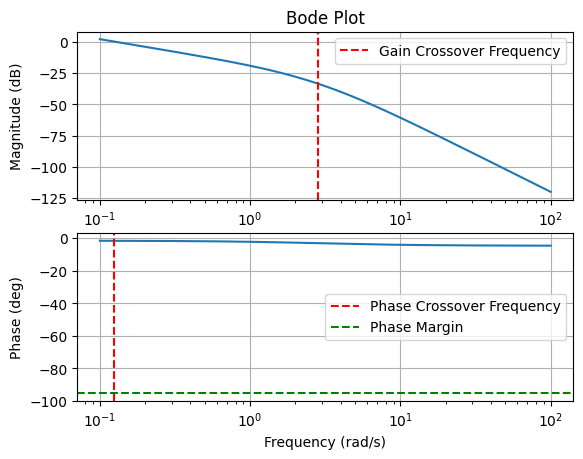

Gain Margin (GM): 47.99999999999999 dB
Phase Margin (PM): 84.64673032244428 degrees
Gain Crossover Frequency: 2.82842712474619 rad/s
Phase Crossover Frequency: 0.12469716902271294 rad/s


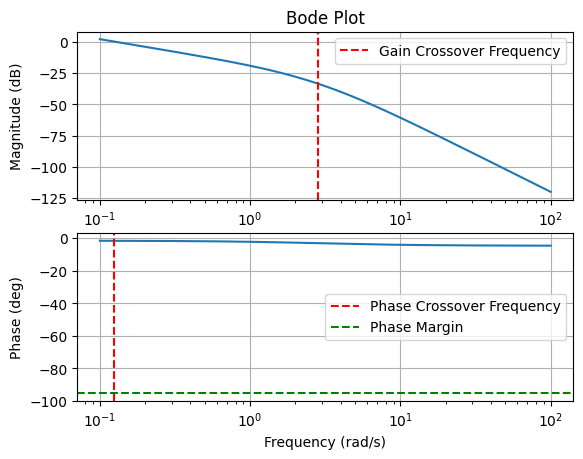

Gain Margin (GM): 3.3121687910411866 dB
Phase Margin (PM): 43.191152459437944 degrees
Gain Crossover Frequency: 3.35511816775169 rad/s
Phase Crossover Frequency: 1.7278352992611372 rad/s


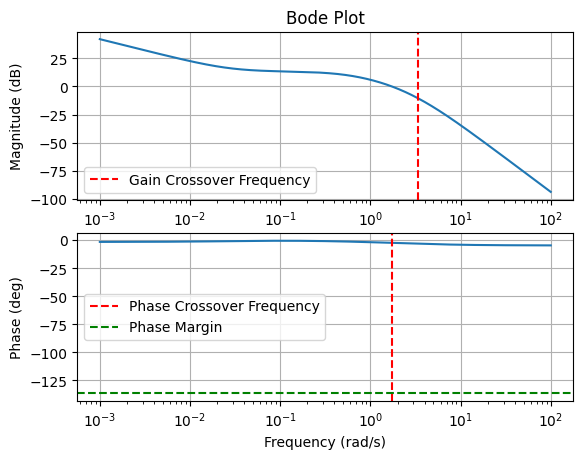

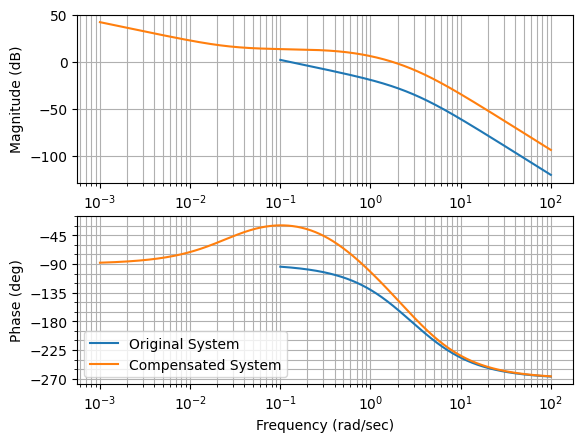

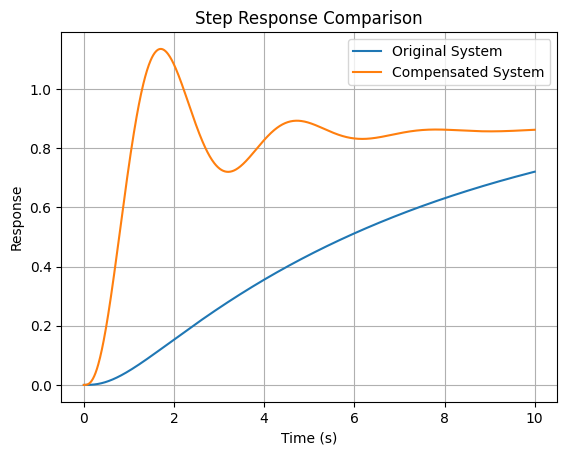

Lead Compensator:


TransferFunction(array([36.70849157,  1.        ]), array([1.75194422, 1.        ]))

In [6]:
G = ctl.TransferFunction([1], [1, 6, 8, 0])

# Analyze original system
gm, pm, wg, wp = analyze_stability(G)

# Design lead compensator
compensator, G_compensated = design_lead_compensator(G)

# Analyze compensated system
gm_comp, pm_comp, wg_comp, wp_comp = analyze_stability(G_compensated)

# Step 3: Compare the Original and Compensated Systems
# Bode plot comparison
plt.figure()
ctl.bode(G, dB=True, Hz=False, deg=True, label='Original System')
ctl.bode(G_compensated, dB=True, Hz=False, deg=True, label='Compensated System')
plt.legend()
plt.show()

# Step response comparison
T = np.linspace(0, 10, 1000)
T_orig, yout_orig = ctl.step_response(ctl.feedback(G, 1), T)
T_comp, yout_comp = ctl.step_response(ctl.feedback(G_compensated, 1), T)

plt.figure()
plt.plot(T_orig, yout_orig, label='Original System')
plt.plot(T_comp, yout_comp, label='Compensated System')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Print compensator transfer function
print(f'Lead Compensator:')
compensator